# CSCI-UA 0473 - Introduction to Machine Learning
## HW 2 - Programming Assignment

## Instructions
For this programming assignment, an image (vector) was chosen and was passed through a weird function to obtain something mysterious (vector). 

You are given the mysterious vector and the weird function used to transform the original image. 

AND, YOUR TASK IS TO FIND THE ORIGINAL IMAGE.

Hint: You will find Autograd helpful.

In [44]:
%matplotlib inline

import matplotlib.pyplot as plot
import matplotlib.cm as cm

from autograd import numpy
from autograd import grad

from scipy import optimize

## 1. Given

In [45]:
# The mysterious vector

import pickle    # Library used to save and load values of variables (Technically, it's called Serialization)

shp_original_img = (100, 100)  # Shape of the original image
mysterious_image = pickle.load(open('mysterious_image_t.p', 'rb'))

In [46]:
# The weird function which transformed the original image

def weird_function(x, n_iter=5):
    h = x    
    filt = numpy.array([-1./3, 1./3, -1./3])
    
    for ii in range(n_iter):
        h_l = numpy.concatenate([numpy.array([0]), h[:-1]])
        h_r = numpy.concatenate([h[1:], numpy.array([0])])
        h = filt[0] * h + filt[-1] * h_l + filt[1] * h_r
        
        if numpy.mod(ii, 2) == 0:
            h = numpy.concatenate([h[h.shape[0]//2:],h[:h.shape[0]//2]])
            
    return h

## 2. Your Solution

In [47]:
# Your Code


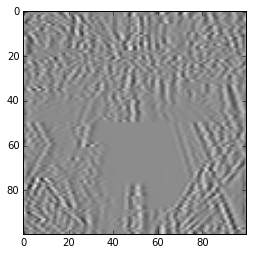

In [58]:
plot.imshow(mysterious_image.reshape(100,100),cmap="gray")

In [48]:
def dot(input_vector):
    return -numpy.dot(mysterious_image, weird_function(input_vector))
def difference(input_vector):
    return numpy.linalg.norm(mysterious_image - weird_function(input_vector))

In [49]:
image = optimize.minimize(difference,numpy.random.rand(10000),jac=grad(difference),bounds=[(0,1)]*10000)

print image

      fun: 1.1663836069260027e-07
 hess_inv: <10000x10000 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.45637659e-05,  -3.32528142e-05,   7.04293372e-05, ...,
         8.69777330e-05,  -1.13780972e-05,  -2.80327340e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 489
      nit: 475
   status: 0
  success: True
        x: array([ 0.86543225,  0.78331617,  0.52524439, ...,  0.02007592,
        0.04357184,  0.01274587])


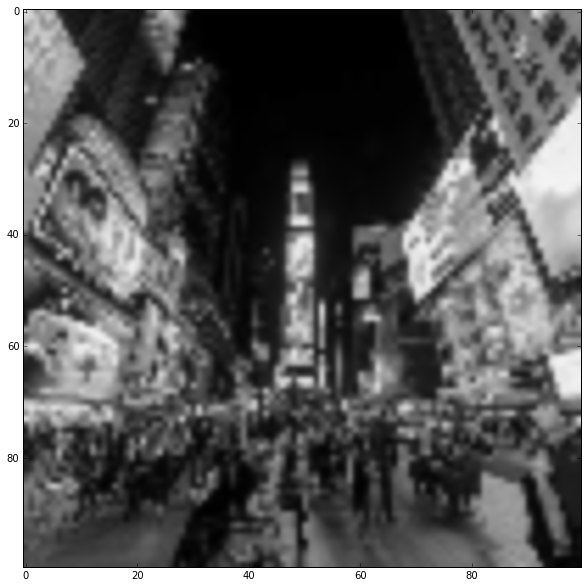

In [50]:
plot.figure(figsize=(10,10))
plot.imshow(image.x.reshape(100,100),cmap="gray",interpolation="gaussian")
plot.show()


In [56]:
print "The difference between the two vectors is",difference(image.x)
print "The negative dot product between the two vectors is",dot(image.x)/(numpy.linalg.norm(mysterious_image)**2)

The difference between the two vectors is 1.16638360693e-07
The negative dot product between the two vectors is -0.999999998292
